In [1]:
# Dependencies

import pandas as pd
import numpy as np
import logging
import tensorflow as tf
import warnings
import glob
import tqdm
import os

from tqdm import tqdm 
from IPython import display 
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from skimage.io import imread, imshow
from skimage.transform import resize

from keras.models import Sequential, load_model
from keras.layers import Conv2D, Lambda, MaxPooling2D, Dense, Dropout, Flatten # convolution layers & core layers

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, History

In [5]:
model = load_model(r'C:\Users\Atharva\Waste Classifier\final_model_weights.keras')

In [27]:
def getprediction(img):
    img = img_to_array(img)  # Convert to NumPy array
    img = img / 255.0  # Normalize pixel values
    plt.imshow(img)  # Show the image
    plt.axis('off')
    
    img = np.expand_dims(img, axis=0)  # Expand dims for batch input

    predictions = model.predict(img)  # Get prediction probabilities
    category = np.argmax(predictions, axis=1)  # Get the class index
    probability = np.max(predictions)  # Get the highest probability

    # Adjust output based on class index
    if category[0] == 1:
        print(f"The image belongs to Recycle waste category, probability: {probability:.4f}.")
    else:
        print(f"The image belongs to Organic waste category, probability: {probability:.4f}.")

In [29]:
from PIL import Image

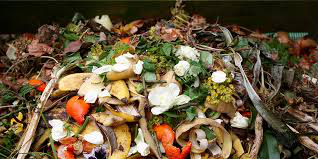

In [31]:
Image.open(r'C:\Users\Atharva\OneDrive\Desktop\Organic Waste.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The image belongs to Organic waste category, probability: 0.8050.


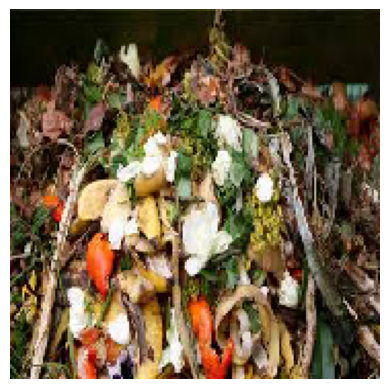

In [33]:
# Test Case 1 - ORGANIC

test_case1 = load_img(r'C:\Users\Atharva\OneDrive\Desktop\Organic Waste.jpeg', target_size=(180,180))
getprediction(test_case1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
The image belongs to Organic waste category, probability: 1.0000.


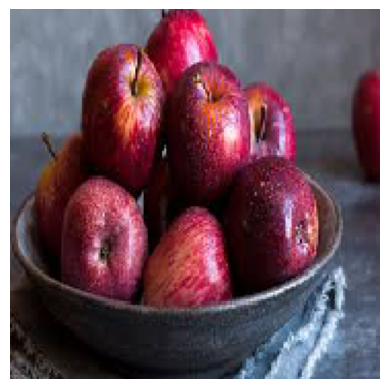

In [39]:
# Test Case 2 - ORGANIC

test_case2 = load_img(r'C:\Users\Atharva\OneDrive\Desktop\Apples.jpeg', target_size=(180,180))
getprediction(test_case2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
The image belongs to Organic waste category, probability: 0.9976.


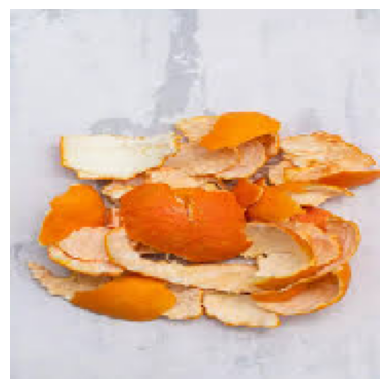

In [41]:
# Test Case 3 - ORGANIC

test_case3 = load_img(r'C:\Users\Atharva\OneDrive\Desktop\orange peels.jpeg', target_size=(180,180))
getprediction(test_case3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The image belongs to Recycle waste category, probability: 0.9804.


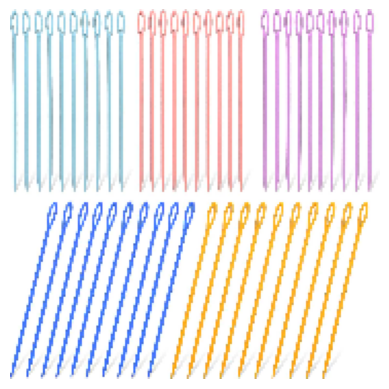

In [49]:
# Test Case 4 - INORGANIC

test_case4 = load_img(r'C:\Users\Atharva\OneDrive\Desktop\plastic.jpg', target_size=(180,180))
getprediction(test_case4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The image belongs to Recycle waste category, probability: 0.9999.


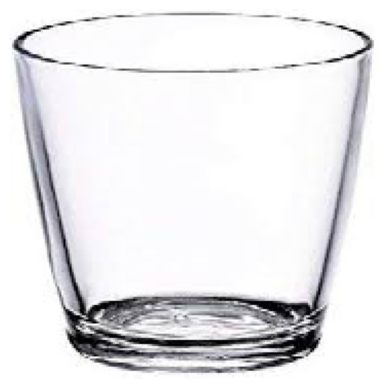

In [57]:
# Test Case 5 - INORGANIC

test_case5 = load_img(r'C:\Users\Atharva\OneDrive\Desktop\glass.jpeg', target_size=(180,180))
getprediction(test_case5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step
The image belongs to Recycle waste category, probability: 0.8626.


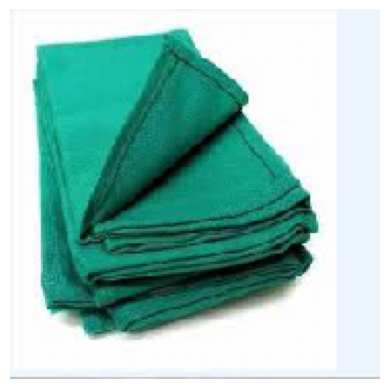

In [58]:
# Test Case 6 - INORGANIC

test_case6 = load_img(r'C:\Users\Atharva\OneDrive\Desktop\cloth folded.jpeg', target_size=(180,180))
getprediction(test_case6)
